<a href="https://colab.research.google.com/github/fzh05/Excited-sendirian-itu-nggak-enak-versi-chat-/blob/main/Pertemuan_4_Data_Mining(Korelasi_numerik).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("/content/Dataset_Retail store sales_Damin1.csv", sep=';')

In [7]:
print("5 data teratas")
print(df.head())

5 data teratas
  Transaction ID;Customer ID;Category;Item;Price Per Unit;Quantity;Total Spent;Payment Method;Location;Transaction Date;Discount Applied
0  TXN_6867343;CUST_09;Patisserie;Item_10_PAT;18....                                                                                    
1  TXN_3731986;CUST_22;Milk Products;Item_17_MILK...                                                                                    
2  TXN_9303719;CUST_02;Butchers;Item_12_BUT;21.5;...                                                                                    
3  TXN_9458126;CUST_06;Beverages;Item_16_BEV;27.5...                                                                                    
4  TXN_4575373;CUST_05;Food;Item_6_FOOD;12.5;7.0;...                                                                                    


In [8]:
# 3. Menampilkan 5 baris terbawah
print("5 data terbawah:")
print(df.tail())

5 data terbawah:
      Transaction ID;Customer ID;Category;Item;Price Per Unit;Quantity;Total Spent;Payment Method;Location;Transaction Date;Discount Applied
12570  TXN_9347481;CUST_18;Patisserie;Item_23_PAT;38....                                                                                    
12571  TXN_4009414;CUST_03;Beverages;Item_2_BEV;6.5;9...                                                                                    
12572  TXN_5306010;CUST_11;Butchers;Item_7_BUT;14.0;1...                                                                                    
12573  TXN_5167298;CUST_04;Furniture;Item_7_FUR;14.0;...                                                                                    
12574  TXN_2407494;CUST_23;Food;Item_9_FOOD;17.0;3.0;...                                                                                    


In [9]:
print("Baris random:")
print(df.sample(5))

Baris random:
      Transaction ID;Customer ID;Category;Item;Price Per Unit;Quantity;Total Spent;Payment Method;Location;Transaction Date;Discount Applied
8211   TXN_8756425;CUST_16;Patisserie;Item_8_PAT;15.5...                                                                                    
4336   TXN_7516721;CUST_12;Patisserie;Item_15_PAT;26....                                                                                    
12059  TXN_5798656;CUST_19;Milk Products;Item_19_MILK...                                                                                    
11397  TXN_1285084;CUST_05;Computers and electric acc...                                                                                    
6557   TXN_6398385;CUST_20;Butchers;Item_20_BUT;33.5;...                                                                                    


In [10]:
# 5. Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (12575, 1)


In [18]:
print("Number of rows and columns:", df.shape)
display(df.head())

Number of rows and columns: (12575, 11)


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08/04/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23/07/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05/10/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07/05/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02/10/2022,False


In [36]:
print("Price per unit", df.shape)
display(df.head(11))

Price per unit (12575, 11)


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08/04/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23/07/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05/10/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07/05/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02/10/2022,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,30/11/2023,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,10/06/2023,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,02/04/2024,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,26/04/2023,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,14/03/2024,False


In [39]:
import pandas as pd

# Data
X1 = [18.5, 29.0, 21.5, 27.5, 12.5, 5.0, 33.5, 27.5, 36.5, 8.0]  # Price Per Unit
X2 = [10, 9, 2, 9, 7, 10, 8, 1, 3, 9]                           # Quantity

# Masukkan ke DataFrame
df = pd.DataFrame({'X1 (Price Per Unit)': X1, 'X2 (Quantity)': X2})

# Hitung rata-rata
mean_x1 = df['X1 (Price Per Unit)'].mean()
mean_x2 = df['X2 (Quantity)'].mean()

# Buat kolom perhitungan manual
df['X1 - mean(X1)'] = df['X1 (Price Per Unit)'] - mean_x1
df['X2 - mean(X2)'] = df['X2 (Quantity)'] - mean_x2
df['(X1-mean)^2'] = df['X1 - mean(X1)']**2
df['(X2-mean)^2'] = df['X2 - mean(X2)']**2
df['(X1-mean)(X2-mean)'] = df['X1 - mean(X1)'] * df['X2 - mean(X2)']

# Tambahkan baris total
df.loc['Σ'] = df.sum(numeric_only=True)

print(df)
print("\nRata-rata X1 =", mean_x1)
print("Rata-rata X2 =", mean_x2)

# Hitung korelasi Pearson
r = df.loc['Σ','(X1-mean)(X2-mean)'] / ((df.loc['Σ','(X1-mean)^2']*df.loc['Σ','(X2-mean)^2'])**0.5)
print("\nKorelasi Pearson (r) =", r)


   X1 (Price Per Unit)  X2 (Quantity)  X1 - mean(X1)  X2 - mean(X2)  \
0                 18.5           10.0  -3.450000e+00   3.200000e+00   
1                 29.0            9.0   7.050000e+00   2.200000e+00   
2                 21.5            2.0  -4.500000e-01  -4.800000e+00   
3                 27.5            9.0   5.550000e+00   2.200000e+00   
4                 12.5            7.0  -9.450000e+00   2.000000e-01   
5                  5.0           10.0  -1.695000e+01   3.200000e+00   
6                 33.5            8.0   1.155000e+01   1.200000e+00   
7                 27.5            1.0   5.550000e+00  -5.800000e+00   
8                 36.5            3.0   1.455000e+01  -3.800000e+00   
9                  8.0            9.0  -1.395000e+01   2.200000e+00   
Σ                219.5           68.0   7.105427e-15   1.776357e-15   

   (X1-mean)^2  (X2-mean)^2  (X1-mean)(X2-mean)  
0      11.9025        10.24              -11.04  
1      49.7025         4.84               15.51

In [40]:
import numpy as np

# Data
X1 = np.array([18.5, 29.0, 21.5, 27.5, 12.5, 5.0, 33.5, 27.5, 36.5, 8.0])  # Price Per Unit
X2 = np.array([10, 9, 2, 9, 7, 10, 8, 1, 3, 9])                           # Quantity

# Varians (pakai n-1, sample variance)
var_x1 = np.var(X1, ddof=1)
var_x2 = np.var(X2, ddof=1)

# Kovarian (pakai n-1, sample covariance)
cov_matrix = np.cov(X1, X2, ddof=1)
cov_x1x2 = cov_matrix[0,1]

print("Varians X1 (Price Per Unit):", var_x1)
print("Varians X2 (Quantity):", var_x2)
print("Kovarian (X1,X2):", cov_x1x2)


Varians X1 (Price Per Unit): 115.52499999999999
Varians X2 (Quantity): 11.955555555555556
Kovarian (X1,X2): -15.733333333333333


In [19]:
print("Ambil baris 1 sampai 3:")
print(df.iloc[1:4])

Ambil baris 1 sampai 3:
  Transaction ID Customer ID       Category          Item  Price Per Unit  \
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   

   Quantity  Total Spent  Payment Method Location Transaction Date  \
1       9.0        261.0  Digital Wallet   Online       23/07/2023   
2       2.0         43.0     Credit Card   Online       05/10/2022   
3       9.0        247.5     Credit Card   Online       07/05/2022   

  Discount Applied  
1             True  
2            False  
3              NaN  


In [21]:
# 8. Filter data sesuai kondisi
filtered = df[df["Quantity"] > 2.0]
filtered

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08/04/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23/07/2023,True
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07/05/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02/10/2022,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,30/11/2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,03/09/2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,12/08/2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,24/08/2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,30/12/2023,True


In [22]:
# 9. Info dataset
print("Info dataset:")
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
None


In [23]:
# 10. Tipe data tiap kolom
print("Tipe data kolom:")
print(df.dtypes)

Tipe data kolom:
Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


In [24]:
# 11. Statistik deskriptif
print("Statistik deskriptif:")
print(df.describe())

Statistik deskriptif:
       Price Per Unit      Quantity   Total Spent
count    11966.000000  11971.000000  11971.000000
mean        23.365912      5.536380    129.652577
std         10.743519      2.857883     94.750697
min          5.000000      1.000000      5.000000
25%         14.000000      3.000000     51.000000
50%         23.000000      6.000000    108.500000
75%         33.500000      8.000000    192.000000
max         41.000000     10.000000    410.000000


In [25]:
df.value_counts()

,,,,,,,,,,,count
Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,
TXN_9998575,CUST_13,Food,Item_6_FOOD,12.5,9.0,112.5,Credit Card,In-store,02/01/2024,True,1
TXN_1002182,CUST_01,Food,Item_5_FOOD,11.0,5.0,55.0,Digital Wallet,In-store,08/10/2024,True,1
TXN_1003865,CUST_15,Furniture,Item_2_FUR,6.5,5.0,32.5,Cash,Online,12/03/2022,False,1
TXN_1003940,CUST_06,Furniture,Item_5_FUR,11.0,9.0,99.0,Digital Wallet,Online,22/04/2022,False,1
TXN_1004091,CUST_04,Food,Item_25_FOOD,41.0,3.0,123.0,Cash,In-store,09/11/2023,False,1
...,...,...,...,...,...,...,...,...,...,...,...
TXN_1014253,CUST_01,Furniture,Item_14_FUR,24.5,9.0,220.5,Credit Card,In-store,15/01/2023,True,1
TXN_1013045,CUST_11,Computers and electric accessories,Item_19_CEA,32.0,4.0,128.0,Cash,In-store,11/07/2023,True,1
TXN_1012276,CUST_16,Food,Item_21_FOOD,35.0,9.0,315.0,Cash,In-store,14/11/2024,True,1


In [26]:
# --- Data Preprocessing ---
# 14. Cek missing values
print("Cek missing values:")
print(df.isnull().sum())

Cek missing values:
Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [27]:
# 15. Identifikasi duplikat
print("Cek duplikat:")
print(df.duplicated().sum())

Cek duplikat:
0


In [28]:
duplikat = df[df.duplicated(keep=False)]
print("Baris Duplikat:")
print(duplikat)

Baris Duplikat:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied]
Index: []


                Price Per Unit  Quantity  Total Spent
Price Per Unit        1.000000  0.011801     0.630902
Quantity              0.011801  1.000000     0.712069
Total Spent           0.630902  0.712069     1.000000


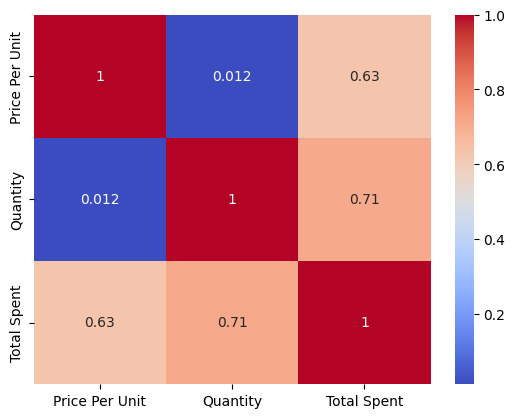

In [30]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
print(correlation_matrix)
plt.show()